In [1]:
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd

(a) Use the breast cancer data set from Homework 0 to create a training set.
Recall that the label is 0 if the patient has breast cancer and 1 otherwise.
Compute the base rate of cancer occurrence over the entire data set.

In [77]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df['diagnosis'] = np.array([cancer.target_names[i] for i in cancer.target])
df.head()
base_rate=sum(df.target==0)/len(df.axes[0])*100
print (base_rate)


37.258347978910365


**On random seeds:** Many functions in scikit-learn, including models as well as utilities,
use randomization. For ease of grading, we will fix a random seed (we will use 101 throughout)
so as to make behavior deterministic. This can generally be done by passing in `random_state=101` to
the function; please consult documentation if unsure. Note to peer graders: this is purely for grading
convenience. Do not penalize harshly if the random seed has not been set properly.

(b) The goal is to build a decision tree that, based on the other features in the set,
predicts whether or not a patient has cancer.  So this is a classification problem.
Using tree.DecisionTreeClassifier and other functions in the scikit-learn library, one can
build a decision tree and calculate both its training accuracy when fitted to the entire data set
as well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).

Vary the depth of your decision tree (use max_depth = $1, 2, \dots, 10$) and plot both training
accuracy and cross-validated accuracy (as a function of the depth, on the x-axis). Use 101 as your
random seed. Plot both curves on the same plot and use a legend to label them.

1.0
91.56641604010025
7
[88.93170426065163, 91.92042606516291, 91.04010025062657, 91.3941102756892, 91.39724310776941, 91.74812030075185, 91.39724310776941, 91.56641604010025, 91.56641604010025, 91.56641604010025]
[92.2671353251318, 94.20035149384886, 97.89103690685414, 98.24253075571178, 99.47275922671353, 99.82425307557118, 100.0, 100.0, 100.0, 100.0]


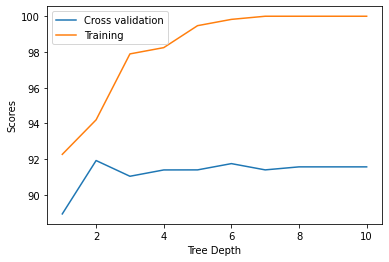

In [79]:
from sklearn.tree import export_text
#building a tree using the entire data set as the training 
decision_tree = DecisionTreeClassifier(random_state=101)
decision_tree.fit(cancer.data, cancer.target)
print(decision_tree.score(cancer.data, cancer.target))
cross_score=cross_val_score(estimator=decision_tree, X=cancer.data, y=cancer.target, cv=10)
print(cross_score.mean()*100)
print(decision_tree.get_depth())

cross = []
train = []
for i in range(1,11):
    decision_tree = tree.DecisionTreeClassifier(random_state=101, max_depth=i)
    crs_scores = cross_val_score(estimator=decision_tree, X=cancer.data, y=cancer.target, cv=10)
    decision_tree.fit(cancer.data, cancer.target)
    trn_scores = decision_tree.score(cancer.data, cancer.target)
    cross.append((crs_scores.mean()*100))
    train.append((trn_scores*100))
print(cross)
print(train)


#visualization of the various max depths
plt.plot(range(1,11), cross, label = "Cross validation")
plt.plot(range(1,11), train, label = "Training")
plt.xlabel('Tree Depth')
plt.ylabel('Scores')
plt.legend()
plt.show()


(c) Now try the random forest classifier of the scikit-learn library and use the best
depth you get from (b) as max_depth. Vary the number of trees in the forest via the parameter
n_estimators and plot its 10-fold cross-validated accuracy (use n_estimators = $1, 2, \dots, 20$).
Again, use 101 as your random seed. Do you see an improvement using random forests versus
using a single tree? (Note: use the n_estimators=1 result as the result for a single tree.)

[91.9235588972431, 94.03508771929825, 93.85651629072682, 93.6779448621554, 93.85651629072682, 93.50250626566415, 94.03195488721805, 94.3828320802005, 94.03195488721806, 93.8533834586466, 94.02882205513784, 94.37969924812029, 94.37969924812029, 94.73370927318297, 94.55827067669172, 94.73057644110276, 94.9091478696742, 94.73370927318297, 94.73370927318297, 94.55827067669172]


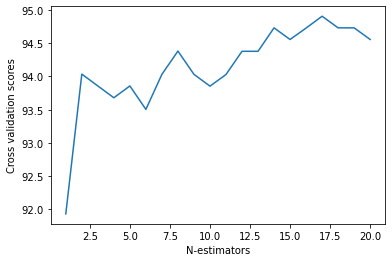

In [80]:
rand_cross = []
for n in range(1,21):
    rand_tree = RandomForestClassifier(random_state=101, max_depth=2, n_estimators=n)
    rand_crs_scores = cross_val_score(estimator=rand_tree, X=cancer.data, y=cancer.target, cv=10)
    rand_cross.append((rand_crs_scores.mean()*100))
print(rand_cross)

plt.plot(range(1,21), rand_cross)
plt.xlabel('N-estimators')
plt.ylabel('Cross validation scores')
plt.show()

(d) Using the method for building a decision tree you used in part (b), build a tree
but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you 
will need to build 4 different trees for each depth value). Use 101 as your random seed for both
the train-test split as well as the decision tree.
For each fraction held out, plot a curve of the test accuracy (the accuracy on the held-out
set) against depth. You should have four curves. Plot them all on the same plot and use
a legend to label them.

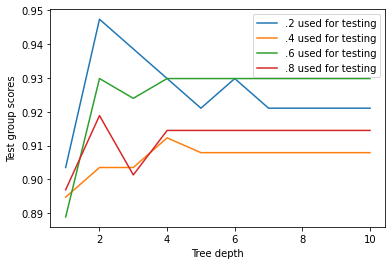

In [86]:

#witholding .2
tst_scores_2=[]
x_train2, x_test2, y_train2, y_test2=train_test_split(cancer.data, cancer.target, test_size=.2, random_state=101)
for depth in range(1,11):
    tree_2 = tree.DecisionTreeClassifier(random_state=101, max_depth=depth)
    tree_2.fit(x_train2, y_train2)
    tst_scores_2.append(tree_2.score(x_test2, y_test2))
#witholding .4
tst_scores_4=[]
x_train4, x_test4, y_train4, y_test4=train_test_split(cancer.data, cancer.target, test_size=.4, random_state=101)
for depth in range(1,11):
    tree_4 = tree.DecisionTreeClassifier(random_state=101, max_depth=depth)
    tree_4.fit(x_train4, y_train4)
    tst_scores_4.append(tree_4.score(x_test4, y_test4))
#witholding .6
tst_scores_6=[]
x_train6, x_test6, y_train6, y_test6=train_test_split(cancer.data, cancer.target, test_size=.6, random_state=101)
for depth in range(1,11):
    tree_6 = tree.DecisionTreeClassifier(random_state=101, max_depth=depth)
    tree_6.fit(x_train6, y_train6)
    tst_scores_6.append(tree_6.score(x_test6, y_test6))
#witholding .8
tst_scores_8=[]
x_train8, x_test8, y_train8, y_test8=train_test_split(cancer.data, cancer.target, test_size=.8, random_state=101)
for depth in range(1,11):
    tree_8 = tree.DecisionTreeClassifier(random_state=101, max_depth=depth)
    tree_8.fit(x_train8, y_train8)
    tst_scores_8.append(tree_8.score(x_test8, y_test8))

#plotting them all
plt.plot(range(1,11), tst_scores_2, label=".2 used for testing")
plt.plot(range(1,11), tst_scores_4, label=".4 used for testing")
plt.plot(range(1,11), tst_scores_6, label=".6 used for testing")
plt.plot(range(1,11), tst_scores_8, label=".8 used for testing")
plt.xlabel('Tree depth')
plt.ylabel('Test group scores')
plt.legend()
plt.show()